<a href="https://colab.research.google.com/github/eddymomanyi/nfl_epa_yac/blob/main/nfl_epa_yac_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nfl_data_py
!pip install pandas==2.2.2
!pip install os
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 49.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.0 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.1 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2024.10.0 requires pandas>=2.1, but you have pandas 1.5.3 which i

In [ ]:

from PIL import Image

In [ ]:
import nfl_data_py as nfl

In [ ]:
import pandas as pd
import os
import urllib.request
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

In [ ]:
pbp = nfl.import_pbp_data([2024])

2024 done.
Downcasting floats.


In [ ]:
pbp.shape

(49922, 391)

In [ ]:
#from google.colab.data_table import DataTable
#DataTable.max_columns = 372
pbp.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,1.0,2024_01_ARI_BUF,2024090801,BUF,ARI,REG,1,None,None,None,...,0.0,0.0,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40.0,2024_01_ARI_BUF,2024090801,BUF,ARI,REG,1,ARI,away,BUF,...,0.0,0.0,0.257819,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,61.0,2024_01_ARI_BUF,2024090801,BUF,ARI,REG,1,ARI,away,BUF,...,0.0,0.0,-0.200602,NaN,NaN,NaN,NaN,NaN,0.456761,-45.676102
3,83.0,2024_01_ARI_BUF,2024090801,BUF,ARI,REG,1,ARI,away,BUF,...,0.0,0.0,2.028874,1.345418,9.321221,8.0,0.509778,0.363807,0.576656,42.334431
4,108.0,2024_01_ARI_BUF,2024090801,BUF,ARI,REG,1,ARI,away,BUF,...,0.0,0.0,0.754242,0.882798,5.783560,4.0,0.668478,0.255140,0.426443,57.355690


In [ ]:
pbp['week']

,week
0,1
1,1
2,1
3,1
4,1
...,...
28765,11
28766,11
28767,11
28768,11


In [ ]:
pbp_rp = pbp[(pbp['pass'] == 1) | (pbp['rush']== 1)]
pbp_rp = pbp_rp.dropna(subset = ['epa', 'posteam', 'defteam'])

In [ ]:
pbp_rp.shape

(36870, 391)

In [ ]:
pass_epa = pbp_rp[(pbp['pass']==1)].groupby('posteam')['epa'].mean().reset_index().rename(columns = {'epa':'pass_epa'})
pass_epa.sort_values('pass_epa', ascending=False)

<ipython-input-27-99cacc50a8a2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pass_epa = pbp_rp[(pbp['pass']==1)].groupby('posteam')['epa'].mean().reset_index().rename(columns = {'epa':'pass_epa'})


,posteam,pass_epa
2,BAL,0.314774
31,WAS,0.277142
10,DET,0.259383
3,BUF,0.252188
6,CIN,0.204955
28,SF,0.198580
0,ARI,0.172975
11,GB,0.170512
29,TB,0.143401
15,KC,0.133657


In [ ]:
rush_epa = pbp_rp[(pbp_rp['rush']==1)].groupby('posteam')['epa'].mean().reset_index().rename(columns = {'epa': 'rush_epa'})
epa = pd.merge(pass_epa, rush_epa, on = 'posteam')
epa.head()

,posteam,pass_epa,rush_epa
0,ARI,0.172975,-0.034134
1,ATL,0.112974,-0.058408
2,BAL,0.314774,0.028441
3,BUF,0.252188,0.023842
4,CAR,-0.201399,-0.050683


In [ ]:
logos = nfl.import_team_desc()[['team_abbr', 'team_logo_espn']]


,team_abbr,team_logo_espn
0,ARI,https://a.espncdn.com/i/teamlogos/nfl/500/ari.png
1,ATL,https://a.espncdn.com/i/teamlogos/nfl/500/atl.png
2,BAL,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png
3,BUF,https://a.espncdn.com/i/teamlogos/nfl/500/buf.png
4,CAR,https://a.espncdn.com/i/teamlogos/nfl/500-dark...
5,CHI,https://a.espncdn.com/i/teamlogos/nfl/500/chi.png
6,CIN,https://a.espncdn.com/i/teamlogos/nfl/500/cin.png
7,CLE,https://a.espncdn.com/i/teamlogos/nfl/500/cle.png
8,DAL,https://a.espncdn.com/i/teamlogos/nfl/500/dal.png
9,DEN,https://a.espncdn.com/i/teamlogos/nfl/500/den.png


In [ ]:
nfl.import_team_desc().columns

Index(['team_abbr', 'team_name', 'team_id', 'team_nick', 'team_conf',
       'team_division', 'team_color', 'team_color2', 'team_color3',
       'team_color4', 'team_logo_wikipedia', 'team_logo_espn', 'team_wordmark',
       'team_conference_logo', 'team_league_logo', 'team_logo_squared'],
      dtype='object')

In [ ]:
nfl.import_team_desc()['team_color'][25]

'#003F2D'

In [ ]:
logo_paths = []
team_abbr = []

if not os.path.exists("logos"):
  os.makedirs("logos")

for team in range(len(logos)):
  urllib.request.urlretrieve(logos['team_logo_espn'][team], f"logos/{logos['team_abbr'][team]}.tif")
  logo_paths.append(f"logos/{logos['team_abbr'][team]}.tif")
  team_abbr.append(logos['team_abbr'][team])

data = {'team_abbr' : team_abbr, 'logo_path' : logo_paths}
logo_data = pd.DataFrame(data)

epa_with_logos = pd.merge(epa, logo_data, left_on = 'posteam', right_on = 'team_abbr')

In [ ]:
epa_with_logos

,pass_epa,rush_epa
count,32.000000,32.000000
mean,0.060815,-0.081992
std,0.133496,0.085514
min,-0.201399,-0.342462
25%,-0.048364,-0.135571
50%,0.066997,-0.073717
75%,0.150178,-0.033698
max,0.314774,0.050279


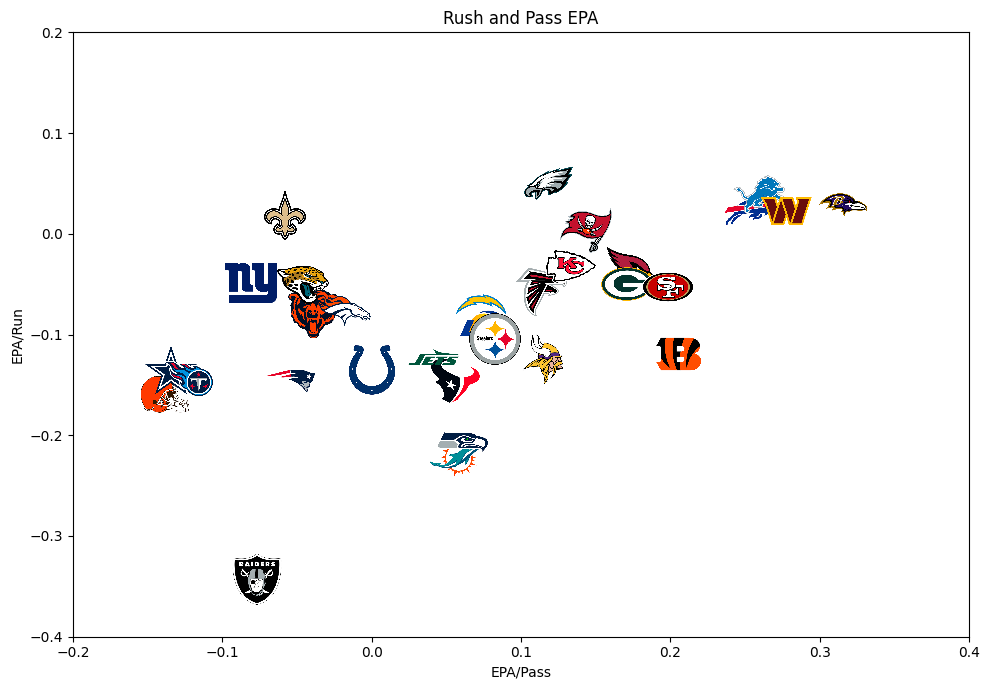

In [ ]:
plt.rcParams["figure.figsize"] = [10, 7]
plt.rcParams["figure.autolayout"] = True

def getImage(path):
  img= Image.open(path)
  img=img.resize((500,500), Image.LANCZOS)
  return OffsetImage(img, zoom = .08)

x = epa_with_logos['pass_epa']
y = epa_with_logos['rush_epa']
paths = epa_with_logos['logo_path']

fig, ax = plt.subplots()

for x0, y0, path in zip(x, y, paths):
  ab = AnnotationBbox(getImage(path), (x0, y0), frameon = False)
  ax.add_artist(ab)


plt.xlim(-0.2, 0.4)
plt.ylim(-0.4, 0.2)
plt.title("Rush and Pass EPA")
plt.xlabel("EPA/Pass")
plt.ylabel("EPA/Run")
plt.show()

In [ ]:
receiver_yac = pbp_rp[(pbp_rp['pass']==1)].groupby('receiver_player_name').agg({'pass': 'count',
'yards_after_catch': 'sum'}).reset_index().rename(columns = {'pass': 'targets', 'yards_after_catch':'yac'})
receiver_yac = receiver_yac[(receiver_yac['targets'] >= 70) & (receiver_yac['yac'] >= 180)]
receiver_yac.sort_values('yac', inplace = True)

In [ ]:
receiver_yac['receiver_player_name'].iloc[0]

'D.Adams'

In [ ]:
names_and_targets=[]

for name in range(len(receiver_yac)):
  names_and_targets.append(f"{receiver_yac['receiver_player_name'].iloc[name]} ({receiver_yac['targets'].iloc[name]})")

names_and_targets

['D.Adams (73)',
 'D.Metcalf (71)',
 'T.Kelce (80)',
 'M.Nabers (95)',
 'D.Mooney (81)',
 'W.Robinson (84)',
 'J.Downs (71)',
 'A.St. Brown (78)',
 'C.Otton (70)',
 'J.Jefferson (86)',
 'D.Moore (95)',
 'J.Smith-Njigba (86)',
 'G.Wilson (108)',
 'T.Hill (92)',
 'C.Lamb (108)',
 'Z.Flowers (79)',
 'B.Bowers (89)',
 'A.Kamara (73)',
 'J.Chase (100)',
 'J.Williams (85)']

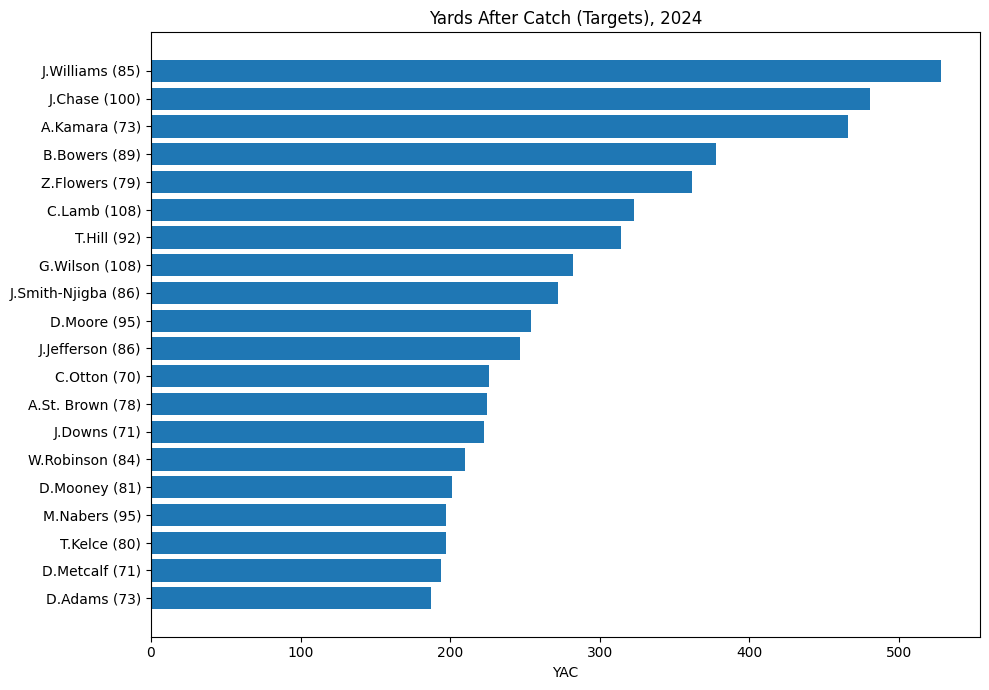

In [ ]:
name = receiver_yac['receiver_player_name']
yac = receiver_yac['yac']
targets = receiver_yac['targets']

fig, ax = plt.subplots(figsize = (10,7))

ax.barh(names_and_targets, yac)
ax.set_title("Yards After Catch (Targets), 2024")
ax.set_xlabel("YAC")
plt.show()
